[[ 0.          0.          0.        ]
 [-0.22340065 -0.44180209  0.86885158]
 [-0.26478835 -1.32807836  0.40754753]
 [-0.0413877  -0.88627627 -0.46130405]
 [ 0.97384763 -0.13901539  0.17970952]
 [ 0.75044698 -0.58081749  1.0485611 ]
 [ 0.70905928 -1.46709376  0.58725705]
 [ 0.93245993 -1.02529167 -0.28159453]]
[[ 0.          0.          0.        ]
 [-0.22340065 -0.44180209  0.86885158]
 [-0.26478835 -1.32807836  0.40754753]
 [-0.0413877  -0.88627627 -0.46130405]
 [ 0.97384763 -0.13901539  0.17970952]
 [ 0.75044698 -0.58081749  1.0485611 ]
 [ 0.70905928 -1.46709376  0.58725705]
 [ 0.93245993 -1.02529167 -0.28159453]]


Text(0.5, 1.0, 'perspective')

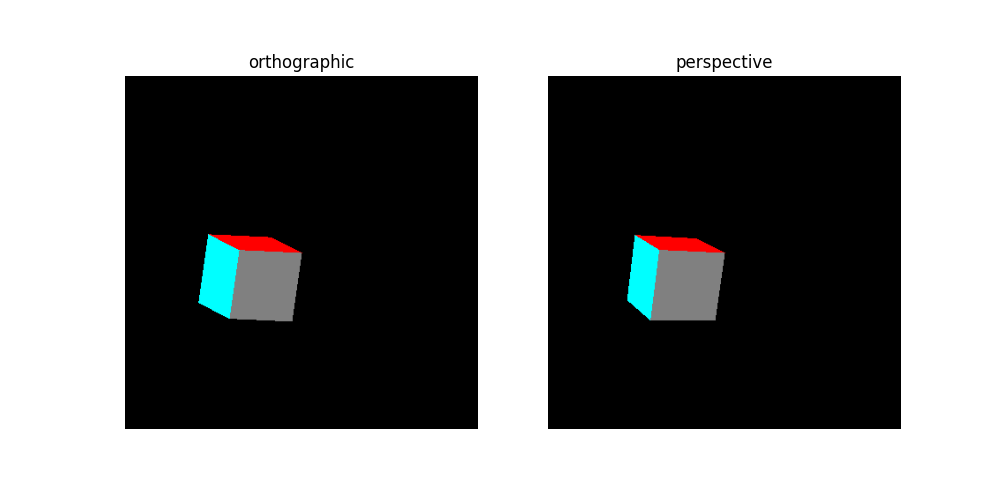

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from math import pi
%matplotlib widget

def pt_in_tri(p, p0, p1, p2):
    s = (p0[0] - p2[0]) * (p[1] - p2[1]) - (p0[1] - p2[1]) * (p[0] - p2[0]) #s, t, 1-s-t are barycentric coords
    t = (p1[0] - p0[0]) * (p[1] - p0[1]) - (p1[1] - p0[1]) * (p[0] - p0[0])

    if ((s < 0) != (t < 0) and s != 0 and t != 0):
        return False

    d = (p2[0] - p1[0]) * (p[1] - p1[1]) - (p2[1] - p1[1]) * (p[0] - p1[0])
    return d == 0 or (d < 0) == (s + t <= 0)
    
def pt_in_tri2(p, p0, p1, p2):
    dX = p[0]-p2[0];
    dY = p[1]-p2[1];
    dX21 = p2[0]-p1[0];
    dY12 = p1[1]-p2[1];
    D = dY12*(p0[0]-p2[0]) + dX21*(p0[1]-p2[1]);
    s = dY12*dX + dX21*dY;
    t = (p2[1]-p0[1])*dX + (p0[0]-p2[0])*dY;
    if (D<0):
        return s<=0 and t<=0 and s+t>=D
    else:
        return s>=0 and t>=0 and s+t<=D;

def pt_in_tri_edge(p, p0, p1, p2):
    def edgeFunction(a, b, c):
        return (c[0] - a[0])*(b[1] - a[1]) - (c[1] - a[1])*(b[0] - a[0]) <= 0
    return not (edgeFunction(p0, p1, p) or edgeFunction(p1, p2, p) or edgeFunction(p2, p0, p))
    


def draw_tetra(ax, offset, scale, zdist, roll, pitch, yaw, ortho=False):

    '''Tetrahedron'''
    # # triangle vertices
    # vertices = np.matrix([
    #     [0, 0, 0], #tetrahedron
    #     [0, 0, 1], 
    #     [0, 1, 0], 
    #     [1, 0, 0]
    # ])
    # # indices for each face, then the rgb color
    # faces = np.array([
    #     [[0, 1, 2], [255, 0, 0]],  # red
    #     [[0, 1, 3], [0, 255, 0]],  # green 
    #     [[0, 2, 3], [50, 50, 255]],  #light blue
    #     [[1, 2, 3], [255, 255, 0]]  #yellow
    # ])

    '''Cube'''
    vertices = np.array([
        [0, 0, 0],  # Vertex 0
        [1, 0, 0],  # Vertex 1
        [1, 1, 0],  # Vertex 2
        [0, 1, 0],  # Vertex 3
        [0, 0, 1],  # Vertex 4
        [1, 0, 1],  # Vertex 5
        [1, 1, 1],  # Vertex 6
        [0, 1, 1]   # Vertex 7
    ])
    faces = np.array([
        [[0, 1, 2], [255, 0, 0]],    # Face 0: red
        [[0, 2, 3], [255, 0, 0]],

        [[1, 5, 6], [50, 50, 255]],  # Face 1: light blue
        [[1, 6, 2], [50, 50, 255]],

        [[5, 4, 7], [255, 0, 255]],  # Face2 : purple
        [[5, 7, 6], [255, 0, 255]],  

        [[4, 0, 3], [128, 128, 128]], # Face 3: gray
        [[4, 3, 7], [128, 128, 128]],

        [[3, 2, 6], [0, 255, 255]], # Face 4: cyan
        [[3, 6, 7], [0, 255, 255]],

        [[4, 5, 1], [255, 255, 0]], # Face 5: yellow
        [[4, 1, 0], [255, 255, 0]],
    ])


    roll_mat = np.matrix([
        [1, 0, 0], 
        [0, np.cos(roll), -np.sin(roll)], 
        [0, np.sin(roll), np.cos(roll)]
    ])
    pitch_mat = np.matrix([
        [np.cos(pitch), 0, np.sin(pitch)], 
        [0, 1, 0], 
        [-np.sin(pitch), 0, np.cos(pitch)]
    ])
    yaw_mat = np.matrix([
        [np.cos(yaw), -np.sin(yaw), 0], 
        [np.sin(yaw), np.cos(yaw), 0], 
        [0, 0, 1]
    ])

    vertices = np.array((roll_mat@pitch_mat@yaw_mat@(vertices.T)).T)
    print(vertices)

    # print(vertices)
    # Screen parameters
    width, height = 400, 400
    screen = np.zeros((height, width, 3), dtype=np.uint8)  # RGB image buffer

    # def draw_line(p1, p2):
    #     """Draw a line between two points on the screen."""
    #     x1, y1 = p1
    #     x2, y2 = p2
    #     dx = abs(x2 - x1)
    #     dy = abs(y2 - y1)
    #     if(dx == 0 and dy==0):
    #         return
    #     if dx > dy:
    #         steps = dx
    #     else:
    #         steps = dy
    #     x_increment = (x2 - x1) / steps
    #     y_increment = (y2 - y1) / steps
    #     # print("steps", steps)
    #     x, y = x1, y1
    #     for _ in range(int(steps)-1):
    #         try:
    #             screen[int(x)][int(y)] = [255, 255, 255]  # White color
    #         except:
    #             # print('out')
    #             pass
    #         x += x_increment
    #         y += y_increment



    '''Microblaze part'''
    # loop through each 3D face, generate list of 2D triangles 
    tri_list = []
    for face_index in range(len(faces)):
        face_v_indexes = faces[face_index][0]

        v = np.zeros((3, 3))
        for i in range(3):
            v[i] = vertices[face_v_indexes[i]] #each is 3d vector

        # Convert vertices to screen space
        v_screen = np.zeros((3, 3))
        for i in range(3):
            if(ortho):
                v_screen[i][0] = (v[i][0]) * scale*0.1 + offset # x screen coord
                v_screen[i][1] = (v[i][1]) * scale*0.1 + offset # y screen coord
                v_screen[i][2] = v[i][2]
            else:
                v_screen[i][0] = (v[i][0]) * scale / (v[i][2] + zdist) + offset # x screen coord
                v_screen[i][1] = (v[i][1]) * scale / (v[i][2] + zdist) + offset # y screen coord
                v_screen[i][2] = v[i][2]

        face_min_z = min(v_screen[0][2], v_screen[1][2], v_screen[2][2])
        tri_list.append((v_screen[0], v_screen[1], v_screen[2], face_min_z))
        # draw_line(v_screen[0], v_screen[1])
        # draw_line(v_screen[1], v_screen[2])
        # draw_line(v_screen[2], v_screen[0])

    # for tri in tri_list:
    #     print(tri)


    '''Vivado part '''
    for x in range(0, width):
        for y in range(0, height):
            p = (x,y)
            min_z = 1e9
            for tri_index in range(len(tri_list)):
                tri = tri_list[tri_index]
                rgb = faces[tri_index][1]


                p0 = tri[0]
                p1 = tri[1]
                p2 = tri[2]

                # s = (p0[0] - p2[0]) * (p[1] - p2[1]) - (p0[1] - p2[1]) * (p[0] - p2[0]) #s, t, 1-s-t are barycentric coords
                # t = (p1[0] - p0[0]) * (p[1] - p0[1]) - (p1[1] - p0[1]) * (p[0] - p0[0])
                # if ((s < 0) != (t < 0) and s != 0 and t != 0):
                #     is_in_tri = False
                # else:
                #     d = (p2[0] - p1[0]) * (p[1] - p1[1]) - (p2[1] - p1[1]) * (p[0] - p1[0])
                #     is_in_tri = d == 0 or (d < 0) == (s + t <= 0)

                is_in_tri = pt_in_tri2(p, p0, p1, p2)
                # is_in_tri_edge = pt_in_tri_edge(p, p0, p1, p2)

                # depth = lambda0*p0[2] + lambda1*p1[2] + lambda2*p2[2]
                depth = tri[3]

                if(is_in_tri):
                # if(is_in_tri):
                    if(depth < min_z):
                        min_z = depth
                        screen[x][y] = rgb



    # Display the rendered image
    ax.imshow(screen)
    ax.axis('off')
    # plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10,5))
# draw_tetra(axs[0], 200, 800, 10, 2.6, 0.2, 3.1, ortho=True)
draw_tetra(axs[0], 200, 800, 10, 3.8, 1.8, 6.1, ortho=True)
axs[0].set_title("orthographic")
draw_tetra(axs[1], 200, 800, 10, 3.8, 1.8, 6.1, ortho=False)
axs[1].set_title("perspective")

interactive(children=(FloatSlider(value=200.0, description='offset', max=400.0, step=1.0), FloatSlider(value=8…

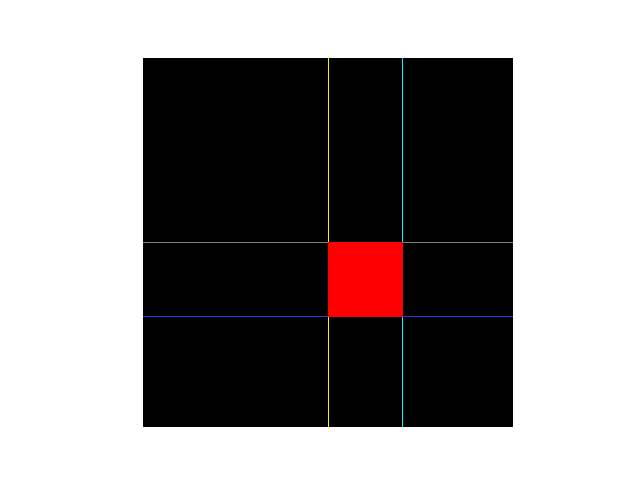

In [20]:
plt.close('all')
fig, ax = plt.subplots(1, 1)
@interact(
    offset=FloatSlider(min=0, max=400, step=1, value=200),
    scale=FloatSlider(min=0, max=1000, step=1, value=800),
    zdist=FloatSlider(min=2, max=50, step=1, value=10),

    roll=FloatSlider(min=0, max=2*pi, step=0.1, value=0),
    pitch=FloatSlider(min=0, max=2*pi, step=0.1, value=0),
    yaw=FloatSlider(min=0, max=2*pi, step=0.1, value=0)
)
def display_image(offset, scale, zdist, roll, pitch, yaw):
    ax.clear()
    draw_tetra(ax, offset, scale, zdist, roll, pitch, yaw, ortho=True)
    

plt.show()